In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Bring in our data
file_path = 'Clean_CoC_Data.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Preview the dataframe
df.head()

,State,CoC Number,CoC Name,CoC Category,Count Types,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Age 25 to 34,Overall Homeless - Age 35 to 44,...,Overall Homeless Parenting Youth Age 18-24,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth
0,AK,AK-500,Anchorage CoC,Other Largely Urban CoC,Sheltered and Unsheltered Count,1760.0,185.0,161.0,377.0,419.0,...,10.0,5.0,5.0,10.0,0.0,10.0,5.0,5.0,10.0,0.0
1,AK,AK-501,Alaska Balance of State CoC,Largely Rural CoC,Sheltered and Unsheltered Count,854.0,176.0,66.0,124.0,190.0,...,8.0,8.0,0.0,8.0,0.0,7.0,7.0,0.0,7.0,0.0
2,AL,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Largely Suburban CoC,Sheltered and Unsheltered Count,847.0,67.0,42.0,127.0,182.0,...,2.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,2.0,0.0
3,AL,AL-501,Mobile City & County/Baldwin County CoC,Other Largely Urban CoC,Sheltered and Unsheltered Count,670.0,110.0,19.0,78.0,156.0,...,2.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0
4,AL,AL-502,Florence/Northwest Alabama CoC,Largely Rural CoC,Sheltered and Unsheltered Count,195.0,63.0,9.0,42.0,36.0,...,4.0,2.0,0.0,2.0,2.0,4.0,2.0,0.0,2.0,2.0


In [3]:
# Create an Age Dataframe for OVERALL HOMELESS

age_columns = [
    'State',
    'CoC Name',
    'Overall Homeless',
    'Overall Homeless - Under 18',
    'Overall Homeless - Age 18 to 24',
    'Overall Homeless - Age 25 to 34',
    'Overall Homeless - Age 35 to 44'
]

# Extract the specific columns
age_df = df[age_columns]

age_df.head()

,State,CoC Name,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Age 25 to 34,Overall Homeless - Age 35 to 44
0,AK,Anchorage CoC,1760.0,185.0,161.0,377.0,419.0
1,AK,Alaska Balance of State CoC,854.0,176.0,66.0,124.0,190.0
2,AL,"Birmingham/Jefferson, St. Clair, Shelby Counti...",847.0,67.0,42.0,127.0,182.0
3,AL,Mobile City & County/Baldwin County CoC,670.0,110.0,19.0,78.0,156.0
4,AL,Florence/Northwest Alabama CoC,195.0,63.0,9.0,42.0,36.0


In [4]:
# Calculate the sum of each column individually
sum_overall_homeless = age_df['Overall Homeless'].sum()
sum_under_18 = age_df['Overall Homeless - Under 18'].sum()
sum_age_18_to_24 = age_df['Overall Homeless - Age 18 to 24'].sum()
sum_age_25_to_34 = age_df['Overall Homeless - Age 25 to 34'].sum()
sum_age_35_to_44 = age_df['Overall Homeless - Age 35 to 44'].sum()

# Format the sums nicely
formatted_sums = {
    'Overall Homeless': '{:,.0f}'.format(sum_overall_homeless),
    'Overall Homeless - Under 18': '{:,.0f}'.format(sum_under_18),
    'Overall Homeless - Age 18 to 24': '{:,.0f}'.format(sum_age_18_to_24),
    'Overall Homeless - Age 25 to 34': '{:,.0f}'.format(sum_age_25_to_34),
    'Overall Homeless - Age 35 to 44': '{:,.0f}'.format(sum_age_35_to_44)
}

# Create a DataFrame to store the formatted sums
age_sum_df = pd.DataFrame(formatted_sums.items(), columns=['Column', 'Sum'])

# Display the DataFrame
age_sum_df

,Column,Sum
0,Overall Homeless,"653,104"
1,Overall Homeless - Under 18,"111,620"
2,Overall Homeless - Age 18 to 24,"47,436"
3,Overall Homeless - Age 25 to 34,"111,002"
4,Overall Homeless - Age 35 to 44,"119,297"


In [5]:
# Format as Percentages 

# Calculate the sum of the "Overall Homeless" column
total_overall_homeless = age_df['Overall Homeless'].sum()

# Calculate the percentage for each sum and format as percentage
percentage_overall_homeless = {
    'Overall Homeless - Under 18': '{:.2%}'.format(sum_under_18 / total_overall_homeless),
    'Overall Homeless - Age 18 to 24': '{:.2%}'.format(sum_age_18_to_24 / total_overall_homeless),
    'Overall Homeless - Age 25 to 34': '{:.2%}'.format(sum_age_25_to_34 / total_overall_homeless),
    'Overall Homeless - Age 35 to 44': '{:.2%}'.format(sum_age_35_to_44 / total_overall_homeless)
}

# Create a DataFrame to store the percentages
age_percentage_df = pd.DataFrame(percentage_overall_homeless.items(), columns=['Column', 'Percentage of Overall Homeless'])

# Display the DataFrame
age_percentage_df

,Column,Percentage of Overall Homeless
0,Overall Homeless - Under 18,17.09%
1,Overall Homeless - Age 18 to 24,7.26%
2,Overall Homeless - Age 25 to 34,17.00%
3,Overall Homeless - Age 35 to 44,18.27%


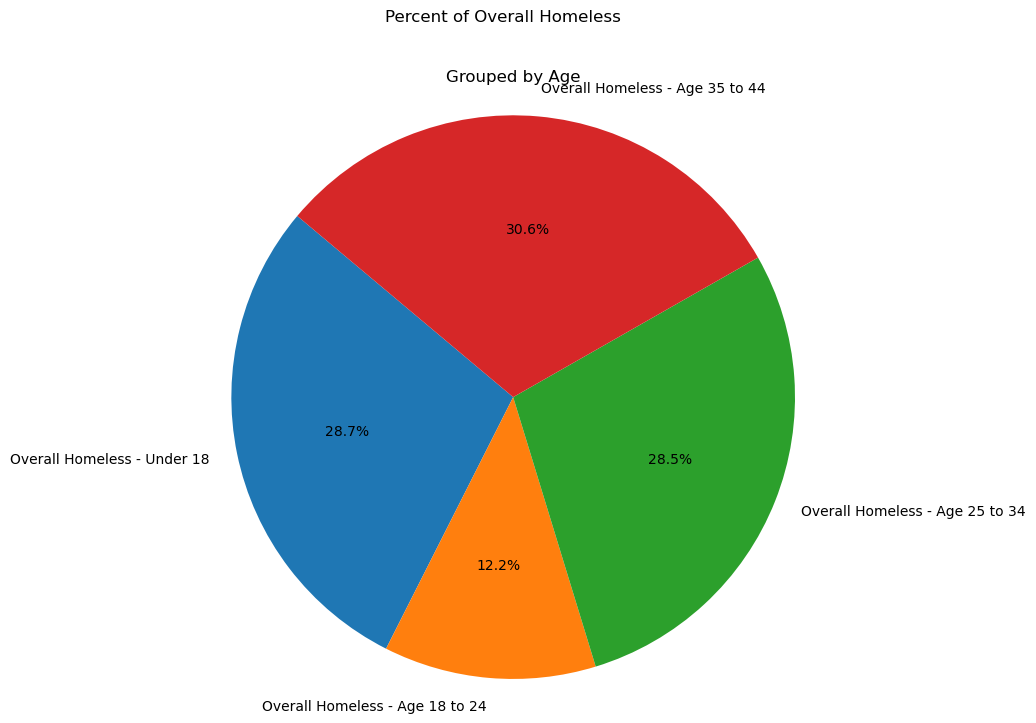

<Figure size 640x480 with 0 Axes>

In [6]:
# Create Pie Chart

# Extract labels and percentages from the DataFrame
labels = age_percentage_df['Column']
percentages = age_percentage_df['Percentage of Overall Homeless']

# Convert percentages from string to float for plotting
percentages_float = percentages.str.rstrip('%').astype(float)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentages_float, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Grouped by Age')
plt.suptitle('Percent of Overall Homeless')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

plt.savefig('ercent of Overall Homeless - Grouped by Age.png')

As we can see from this chart there is not one single age group that dominates the overall homeless population, however the age group consisiting of 35-44 year old individuals does take up the largest percent at 30.6%. 

Individuals age 18 to 24 account for just 12% of the overall homeless population. 

In [7]:
# Create an Age Dataframe for TH (TEMP HOUSING)

age_columns = [
    'State',
    'CoC Name',
    'Overall Homeless',
    'Overall Homeless - Under 18',
    'Overall Homeless - Age 18 to 24',
    'Overall Homeless - Age 25 to 34',
    'Overall Homeless - Age 35 to 44'
]

# Extract the specific columns
age_df = df[age_columns]

age_df.head()

,State,CoC Name,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Age 25 to 34,Overall Homeless - Age 35 to 44
0,AK,Anchorage CoC,1760.0,185.0,161.0,377.0,419.0
1,AK,Alaska Balance of State CoC,854.0,176.0,66.0,124.0,190.0
2,AL,"Birmingham/Jefferson, St. Clair, Shelby Counti...",847.0,67.0,42.0,127.0,182.0
3,AL,Mobile City & County/Baldwin County CoC,670.0,110.0,19.0,78.0,156.0
4,AL,Florence/Northwest Alabama CoC,195.0,63.0,9.0,42.0,36.0


In [8]:
# VETERANS Dataframe

vets_columns = [
    'State',
    'CoC Name',
    'Overall Homeless',
    'Overall Homeless Veterans',
    'Overall Homeless Veterans - Female',
    'Overall Homeless Veterans - Male'
]

vets_df = df[vets_columns]

vets_df.head()

,State,CoC Name,Overall Homeless,Overall Homeless Veterans,Overall Homeless Veterans - Female,Overall Homeless Veterans - Male
0,AK,Anchorage CoC,1760.0,73.0,8.0,65.0
1,AK,Alaska Balance of State CoC,854.0,46.0,7.0,39.0
2,AL,"Birmingham/Jefferson, St. Clair, Shelby Counti...",847.0,92.0,9.0,83.0
3,AL,Mobile City & County/Baldwin County CoC,670.0,77.0,4.0,73.0
4,AL,Florence/Northwest Alabama CoC,195.0,2.0,2.0,0.0


In [9]:
# Calculate the sum of the "Overall Homeless" column
total_overall_homeless = vets_df['Overall Homeless'].sum()
total_overall_homeless_vets = vets_df['Overall Homeless Veterans'].sum()

# Calculate sums for each gender category
total_overall_female_homeless_vets = vets_df['Overall Homeless Veterans - Female'].sum()
total_overall_male_homeless_vets = vets_df['Overall Homeless Veterans - Male'].sum()


# Calculate the percentage for each sum and format as percentage
percentage_overall_homeless = {
    'Homeless Vets - % of Total Homeless': '{:.2%}'.format(total_overall_homeless_vets / total_overall_homeless),
    'Homeless Female Vets - % of Total Homeless Vets': '{:.2%}'.format(total_overall_female_homeless_vets / total_overall_homeless_vets ),
    'Homeless Male Vets - % of Total Homeless Vets': '{:.2%}'.format(total_overall_male_homeless_vets / total_overall_homeless_vets ),
}

# Create a DataFrame to store the percentages
vets_percentage_df = pd.DataFrame(percentage_overall_homeless.items(), columns=['Column', 'Percentage of Overall Homeless'])

# Display the DataFrame
vets_percentage_df

,Column,Percentage of Overall Homeless
0,Homeless Vets - % of Total Homeless,5.45%
1,Homeless Female Vets - % of Total Homeless Vets,11.19%
2,Homeless Male Vets - % of Total Homeless Vets,87.79%


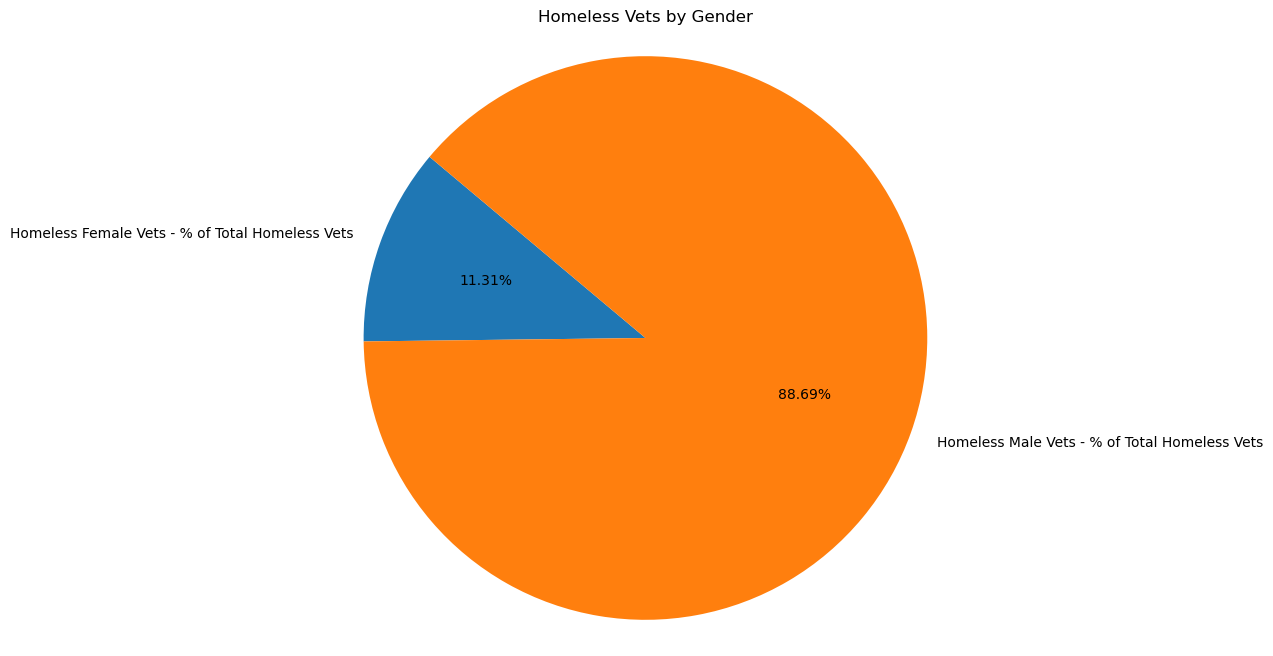

<Figure size 640x480 with 0 Axes>

In [11]:
# Create Pie Chart

# Filter the DataFrame to include only the rows for "Homeless Female Vets" and "Homeless Male Vets"
vets_df2 = vets_percentage_df.loc[1:2]

# Extract labels and percentages from the filtered DataFrame
labels = vets_df2['Column']
percentages = vets_df2['Percentage of Overall Homeless']

# Convert percentages from string to float for plotting
percentages_float = percentages.str.rstrip('%').astype(float)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentages_float, labels=labels, autopct='%1.2f%%', startangle=140)
plt.title('Homeless Vets by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

plt.savefig('Homeless Vets by Gender.png')

As we can see here the overwhelming majority of homeless vets (89%) are Male. 